In [12]:
import os
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['housingDB']  

# Path to the "Data" folder
data_folder = 'Data/'

# List all CSV files in the "Data" folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

# Iterate over CSV files
for csv_file in csv_files:
    # Construct the full path to the CSV file
    csv_path = os.path.join(data_folder, csv_file)

    # Load CSV data into a Pandas DataFrame
    df = pd.read_csv(csv_path)

    # Convert DataFrame to dictionary for insertion
    data_dict = df.to_dict(orient='records')

    # Create a collection (table) in the MongoDB database
    collection_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the collection name
    collection = db[collection_name]

    # Insert data into the collection
    collection.insert_many(data_dict)

    print(f"Data from '{csv_file}' inserted into MongoDB collection '{collection_name}'")

# Confirm successful insertion
print("Data insertion completed successfully.")


Data from 'home_value.csv' inserted into MongoDB collection 'home_value'
Data from 'market_length&price_drop.csv' inserted into MongoDB collection 'market_length&price_drop'
Data from 'selling_price.csv' inserted into MongoDB collection 'selling_price'
Data insertion completed successfully.


In [13]:
import matplotlib.pyplot as plt
from pymongo import MongoClient
import pandas as pd

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['your_database_name']  # Change 'your_database_name' to your actual database name

# Define CSV files and corresponding collection names
csv_files = {
    'home_value.csv': 'home_value_collection',
    'market_length&price_drop.csv': 'market_collection',
    'selling_price.csv': 'selling_price_collection',
}

# Iterate over CSV files and collections
for csv_file, collection_name in csv_files.items():
    # Fetch data from MongoDB collection
    cursor = db[collection_name].find({})
    df = pd.DataFrame(list(cursor))

    # Check if required columns are present
    required_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
    missing_columns = set(required_columns) - set(df.columns)

    if missing_columns:
        print(f"Warning: Missing columns {missing_columns} in DataFrame for collection {collection_name}. Skipping.")
        continue

    # Melt the DataFrame to have a 'Date' and 'Value' column
    df_melted = df.melt(id_vars=required_columns, var_name='Date', value_name='Value')

    # Convert 'Date' column to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Date'])

    # Group by 'Date' and sum the 'Value' column
    df_grouped = df_melted.groupby('Date')['Value'].sum().reset_index()

    # Sort DataFrame by 'Date'
    df_grouped = df_grouped.sort_values(by='Date')

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(df_grouped['Date'], df_grouped['Value'])
    plt.title(f'Bar Chart for Collection: {collection_name}')
    plt.xlabel('Date')
    plt.ylabel('Sum of Values')
    plt.grid(True)
    plt.show()


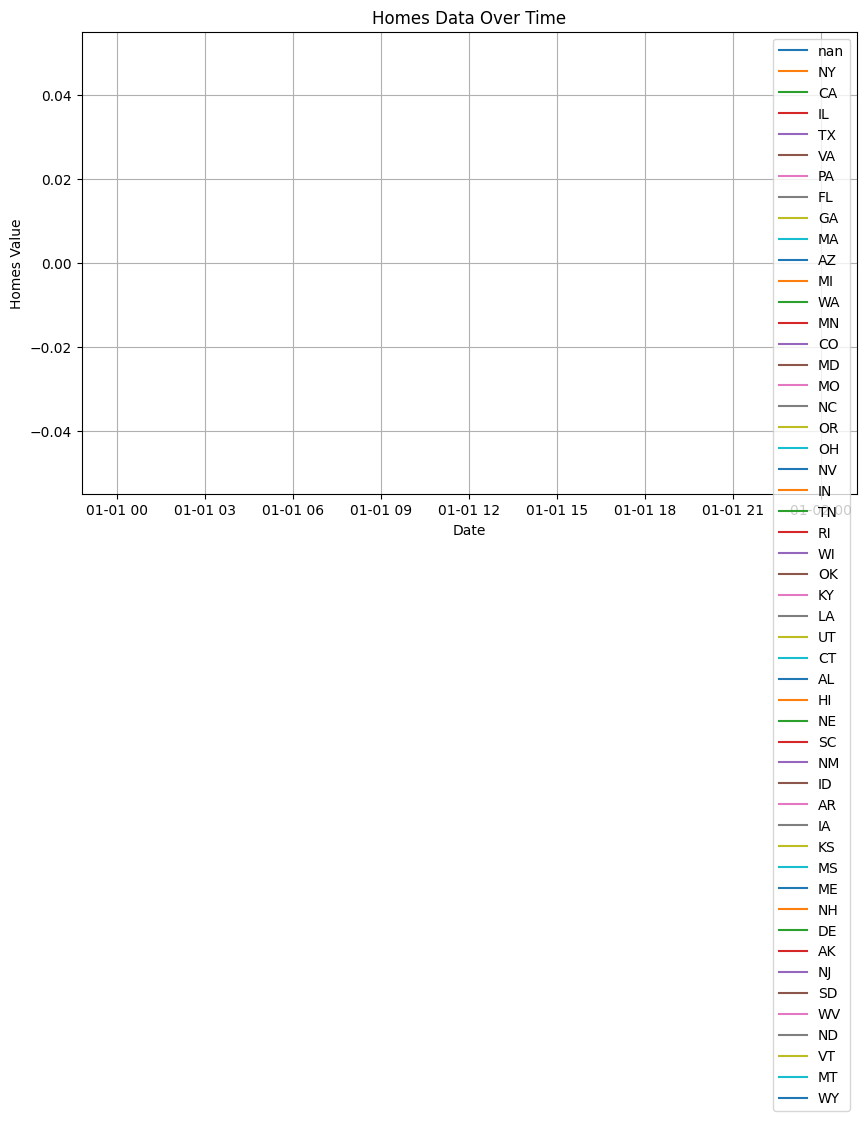

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the "Data" folder
data_folder = "Data"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith(".csv")]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Read each CSV file and merge the data into the combined DataFrame
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Assuming "StateName" is the common column in all CSV files
# Set "StateName" as the index column
combined_data.set_index("StateName", inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

# Iterate through each row (state) and plot the data
for state in combined_data.index.unique():
    state_data = combined_data.loc[state]
    
    # Filter out non-date columns
    date_columns = [col for col in state_data.columns if col.count('/') == 2]
    
    # Skip the first element when converting to datetime
    x_values = pd.to_datetime(date_columns[1:], format="%Y/%m/%d")
    
    y_values = state_data[date_columns].values.flatten()
    
    plt.plot(x_values, y_values, label=state)

# Customize the plot
plt.title("Homes Data Over Time")
plt.xlabel("Date")
plt.ylabel("Homes Value")
plt.legend()
plt.grid(True)
plt.show()
